In [1]:
pip install trimesh open3d numpy pandas pyassimp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.2 MB/s eta 0:00:00
  Created wheel for pyassimp: filename=pyassimp-5.2.5-py3-none-any.whl size=106572 sha256=9ca20d0439cba83789f20809f6408904f4aa5d3eef48d62dd00965b946f6d6d4
  Stored in directory: /root/.cache/pip/wheels/56/f4/c0/8fc49cf15afd65ba31492164142ab1ebb

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

=== COMPARACIÓN INICIAL DE MODELOS ORIGINALES ===


,vertices,faces,normals,duplicate_vertices,watertight,volume,bounds
Shield_UNWRAPED.obj,6109,9416,6109,1329,False,6.125187e+05,"[[-136.2571, -135.1613, -12.80001], [135.7092,..."
Escudo_medieval__0505040812_generate.stl,4984,10000,4984,0,False,4.394235e+08,"[[-1001.1121215820312, -336.71990966796875, -1..."
Escudo_medieval__0505043331_generate.glb,4984,10000,4984,0,False,4.394234e-01,"[[-1.0011121034622192, -1.000791311264038, -0...."



=== CONVERSIÓN Y COMPARACIÓN ===

Comparación OBJ -> STL:


,vertices,faces,normals,duplicate_vertices,watertight,volume,bounds
original,6109,9416,6109,1329,False,612518.732639,"[[-136.2571, -135.1613, -12.80001], [135.7092,..."
converted,4780,9416,4780,0,True,612518.749076,"[[-136.25709533691406, -135.1613006591797, -12..."



Comparación OBJ -> GLB:


,vertices,faces,normals,duplicate_vertices,watertight,volume,bounds
original,6109,9416,6109,1329,False,612518.732639,"[[-136.2571, -135.1613, -12.80001], [135.7092,..."
converted,6109,9416,6109,1329,False,612518.749076,"[[-136.25709533691406, -135.1613006591797, -12..."



=== VISUALIZACIÓN 3D DE MODELOS CONVERTIDOS ===


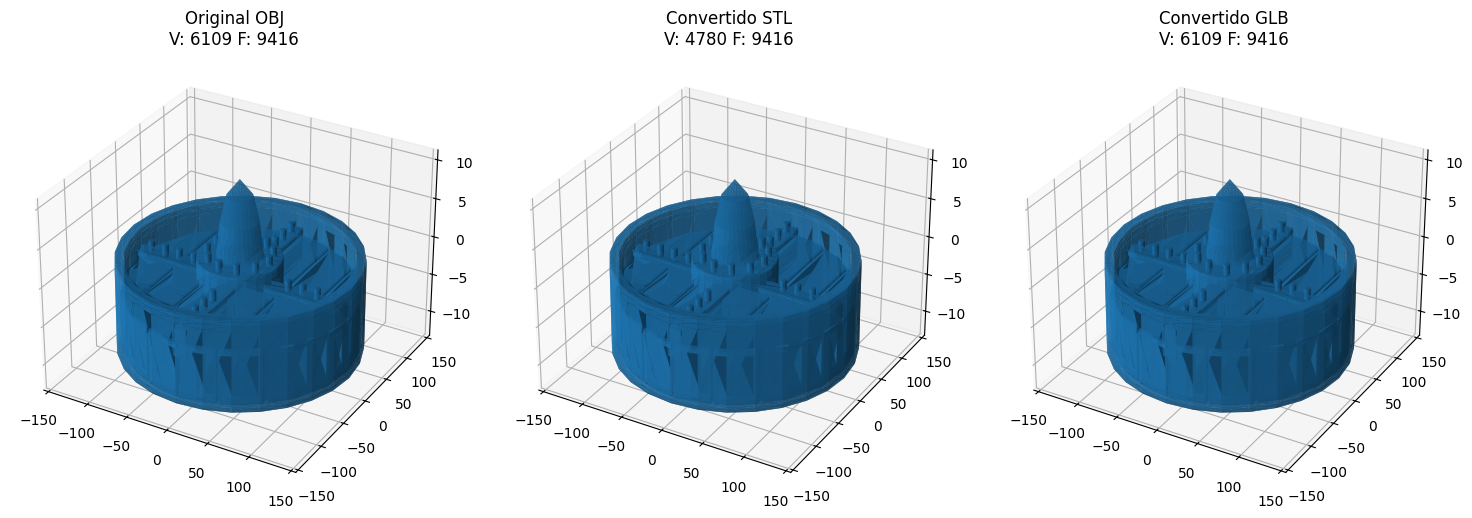

In [8]:
import trimesh
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_model(file_path: str):
    """Carga un modelo 3D usando trimesh"""
    try:
        mesh = trimesh.load(file_path, force='mesh')
        return mesh
    except Exception as e:
        print(f"Error al cargar {file_path}: {str(e)}")
        return None

def analyze_model(mesh) -> dict:
    """Analiza las propiedades de un modelo 3D"""
    if mesh is None:
        return {}

    return {
        'vertices': len(mesh.vertices),
        'faces': len(mesh.faces),
        'normals': len(mesh.vertex_normals),
        'duplicate_vertices': len(mesh.vertices) - len(np.unique(mesh.vertices, axis=0)),
        'watertight': mesh.is_watertight,
        'volume': mesh.volume,
        'bounds': mesh.bounds.tolist()
    }

def convert_and_compare(original_path: str, target_format: str):
    """Convierte un modelo y compara con el original"""
    # Cargar modelo original
    original_mesh = load_model(original_path)
    if original_mesh is None:
        return None

    # Convertir modelo
    output_path = Path(original_path).stem + f"_converted.{target_format}"
    original_mesh.export(output_path, file_type=target_format)

    # Cargar modelo convertido
    converted_mesh = load_model(output_path)

    return {
        'original': analyze_model(original_mesh),
        'converted': analyze_model(converted_mesh)
    }

def visualize_comparison(results: dict):
    """Visualiza la comparación entre modelos originales y convertidos"""
    df = pd.DataFrame.from_dict(results, orient='index')
    display(df)

# Lista de modelos
model_files = [
    '/content/Shield_UNWRAPED.obj',
    '/content/Escudo_medieval__0505040812_generate.stl',
    '/content/Escudo_medieval__0505043331_generate.glb'
]

# 1. Comparación inicial de modelos originales
print("=== COMPARACIÓN INICIAL DE MODELOS ORIGINALES ===")
initial_results = {}
for path in model_files:
    mesh = load_model(path)
    initial_results[Path(path).name] = analyze_model(mesh)
visualize_comparison(initial_results)

# 2. Conversión y nueva comparación
print("\n=== CONVERSIÓN Y COMPARACIÓN ===")

# Convertir el primer modelo (.obj) a .stl y .glb
obj_path = model_files[0]
conversion_results = {}

# Convertir a STL y comparar
stl_comparison = convert_and_compare(obj_path, 'stl')
if stl_comparison:
    print("\nComparación OBJ -> STL:")
    visualize_comparison(stl_comparison)
    conversion_results['obj_to_stl'] = stl_comparison

# Convertir a GLB y comparar
glb_comparison = convert_and_compare(obj_path, 'glb')
if glb_comparison:
    print("\nComparación OBJ -> GLB:")
    visualize_comparison(glb_comparison)
    conversion_results['obj_to_glb'] = glb_comparison

# Visualización 3D de los modelos convertidos
print("\n=== VISUALIZACIÓN 3D DE MODELOS CONVERTIDOS ===")
fig = plt.figure(figsize=(15, 5))

# Visualizar modelo original OBJ
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
original_mesh = load_model(obj_path)
vertices = original_mesh.vertices
faces = original_mesh.faces
ax1.plot_trisurf(vertices[:, 0], vertices[:, 1], faces, vertices[:, 2],
                linewidth=0.2, antialiased=True, shade=True, alpha=0.8)
ax1.set_title(f"Original OBJ\nV: {len(vertices)} F: {len(faces)}")

# Visualizar modelo convertido a STL
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
stl_mesh = load_model(Path(obj_path).stem + "_converted.stl")
vertices = stl_mesh.vertices
faces = stl_mesh.faces
ax2.plot_trisurf(vertices[:, 0], vertices[:, 1], faces, vertices[:, 2],
                linewidth=0.2, antialiased=True, shade=True, alpha=0.8)
ax2.set_title(f"Convertido STL\nV: {len(vertices)} F: {len(faces)}")

# Visualizar modelo convertido a GLB
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
glb_mesh = load_model(Path(obj_path).stem + "_converted.glb")
vertices = glb_mesh.vertices
faces = glb_mesh.faces
ax3.plot_trisurf(vertices[:, 0], vertices[:, 1], faces, vertices[:, 2],
                linewidth=0.2, antialiased=True, shade=True, alpha=0.8)
ax3.set_title(f"Convertido GLB\nV: {len(vertices)} F: {len(faces)}")

plt.tight_layout()
plt.show()